In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
data = pd.read_excel("CW_Data.xlsx")
display(data)

,Index,Gender,Programme,Grade,Total,MCQ,Q1,Q2,Q3,Q4,Q5
0,1,1,3,3,45.0,21,8,4,2,10.0,0
1,2,2,3,3,43.0,21,4,2,8,8.0,0
2,3,1,4,2,26.0,24,0,0,2,0.0,0
3,4,2,1,3,30.0,24,4,0,0,0.0,2
4,5,1,2,3,27.0,21,0,2,4,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
614,615,2,1,2,55.0,33,6,4,4,8.0,0
615,616,2,4,2,41.0,27,6,4,4,0.0,0
616,617,2,1,2,73.0,36,8,8,11,10.0,0
617,618,2,1,2,77.0,42,8,8,6,10.0,3


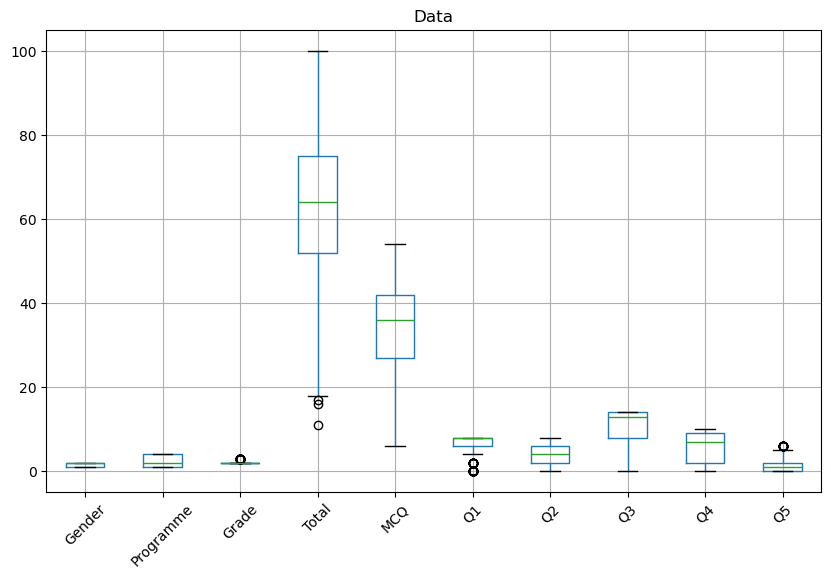

In [2]:
data1 = data.drop(columns=['Index'])
#先把Index去掉
#画个箱型图先
plt.figure(figsize=(10, 6))
data1.boxplot()
plt.title('Data')
plt.xticks(rotation=45)
plt.show()

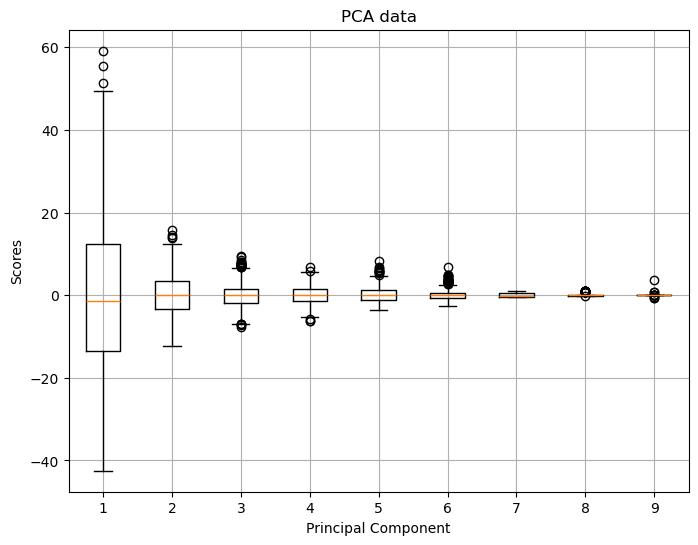

In [4]:
# 去掉Programme后直接PCA
data0 = data1.drop(columns=['Programme'])
pca = PCA()
score = pca.fit_transform(data0)

#再画个PCA后的图
plt.figure(figsize=(8, 6))
plt.boxplot(score)
plt.title('PCA data')
plt.xlabel('Principal Component')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

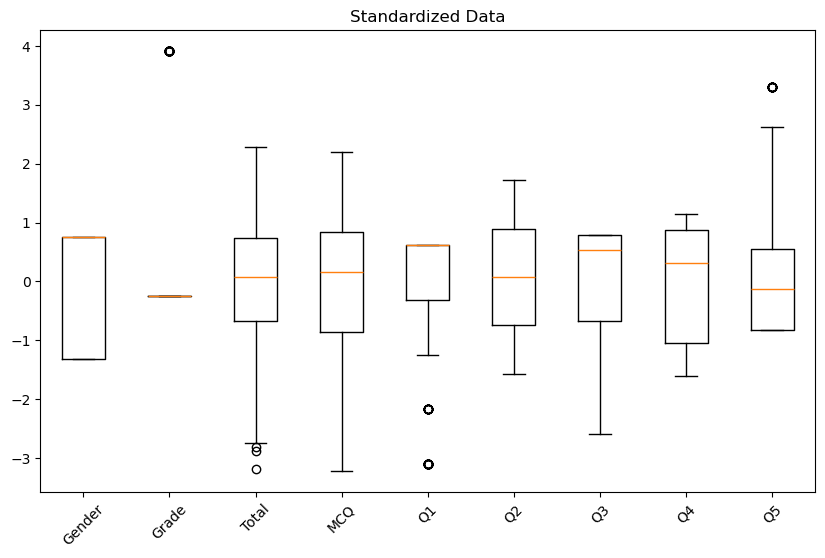

In [5]:
#标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data0)

#再画个标准化后的图
plt.figure(figsize=(10, 6))
plt.boxplot(scaled_data, labels=data0.columns)
plt.title('Standardized Data')
plt.xticks(rotation=45)
plt.show()


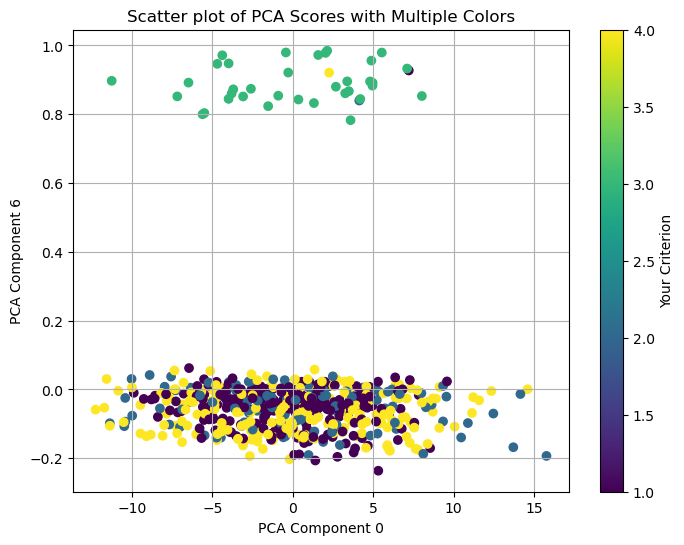

In [9]:
#找最好的特征组合
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 1], score[:, 7],c=data['Programme'],cmap='viridis')
plt.title('Scatter plot of PCA Scores with Multiple Colors')
plt.xlabel('PCA Component 0')
plt.ylabel('PCA Component 6')
plt.colorbar(label='Your Criterion')
plt.grid(True)
plt.show()

In [10]:
# 获取主成分的加载向量
loadings = pca.components_

# 创建 DataFrame 显示加载向量
loadings_df = pd.DataFrame(loadings, columns=data0.columns)

# 显示加载向量表格
print("Loadings of Original Features in Principal Components:")
print(loadings_df)


Loadings of Original Features in Principal Components:
     Gender     Grade     Total       MCQ        Q1        Q2        Q3  \
0 -0.001545 -0.000196 -0.876193 -0.430990 -0.057801 -0.083440 -0.138436   
1  0.002697  0.000859 -0.246936  0.778617 -0.095238 -0.098796 -0.441310   
2  0.024322  0.003505  0.061546 -0.102123  0.100318  0.075571 -0.751059   
3  0.007808 -0.010022  0.122222 -0.201983  0.394348  0.672108 -0.267285   
4  0.003782  0.005557 -0.034604  0.025187 -0.811545  0.569898  0.030626   
5  0.025038  0.010761  0.095497 -0.117583 -0.133244 -0.247661 -0.098203   
6 -0.993975  0.103357  0.001611 -0.000472  0.003771  0.007261 -0.019691   
7  0.103116  0.994439 -0.004573  0.003370  0.013950  0.009895  0.007823   
8 -0.008819  0.012186  0.377150 -0.377233 -0.381374 -0.373586 -0.373523   

         Q4        Q5  
0 -0.123686 -0.042012  
1 -0.341437 -0.051045  
2  0.629078  0.097855  
3 -0.513742  0.038630  
4  0.093825  0.070652  
5 -0.237519  0.911682  
6  0.008220  0.028393  
7 

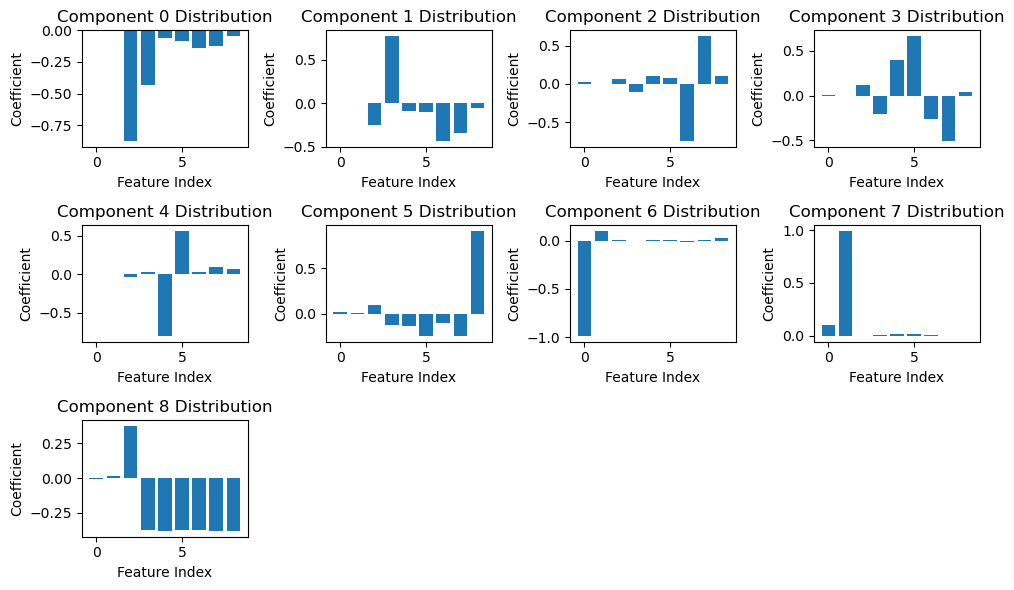

In [11]:
# 获取每个主成分的系数
components = pca.components_

# 绘制每个主成分的分布图
plt.figure(figsize=(10, 6))
for i in range(components.shape[0]):
    plt.subplot(3, 4, i+1)
    plt.bar(range(len(components[i])), components[i])
    plt.title(f'Component {i} Distribution')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient')

plt.tight_layout()
plt.show()
#特征对主成分的贡献
#和上面的加载向量作用一样


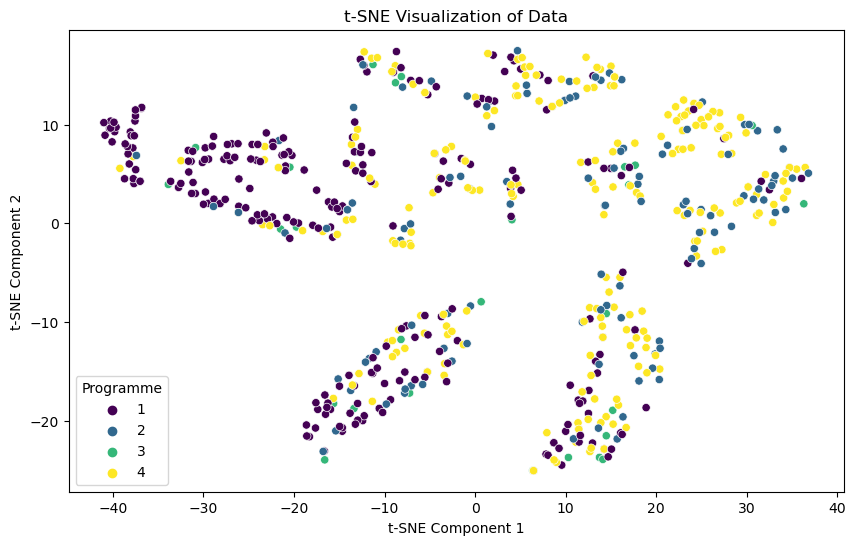

In [20]:
# 假设 data_subset 是包含 Programme 和给定特征集合的数据集
# 筛选数据
import seaborn as sns
from sklearn.manifold import TSNE

# 对数据进行预处理，例如处理缺失值或标准化
from sklearn.preprocessing import StandardScaler

# 创建一个标准化器
scaler = StandardScaler()

# 选择需要标准化的列
columns_to_scale = ['Q2', 'Total','Q4','MCQ']

# 对选择的列进行标准化处理
data_scaled = scaler.fit_transform(data0[columns_to_scale])

# 将标准化后的数据转换为 DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=columns_to_scale)

# 将 Programme 列添加回 DataFrame
data_scaled_df['Programme'] = data['Programme']

# 对每个 Programme 类别的数据应用 t-SNE 算法进行降维
tsne = TSNE()
tsne_data = tsne.fit_transform(data_scaled_df.drop(columns=['Programme']))

# 将 t-SNE 降维后的数据点绘制成散点图，根据 Programme 类别进行着色
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=data['Programme'], palette='viridis')
plt.title('t-SNE Visualization of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Programme')
plt.show()

#为什么效果不一样？？？？？

In [14]:
pca.explained_variance_ratio_

array([8.87776613e-01, 6.05143592e-02, 2.61636454e-02, 1.11407628e-02,
       9.52163391e-03, 4.09136306e-03, 5.81570327e-04, 1.41587131e-04,
       6.84653085e-05])

Text(0, 0.5, 'Explained Variance')

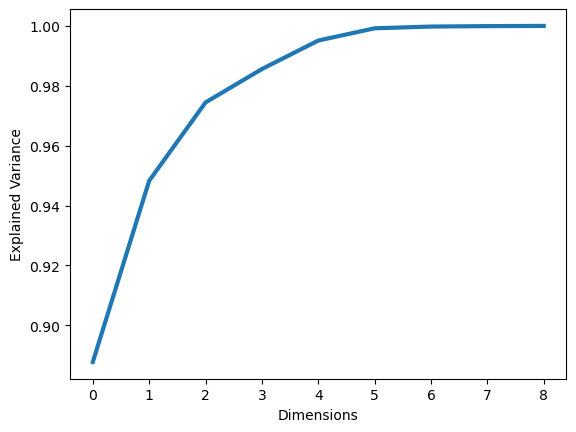

In [15]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
# 主成分数量的变化的影响

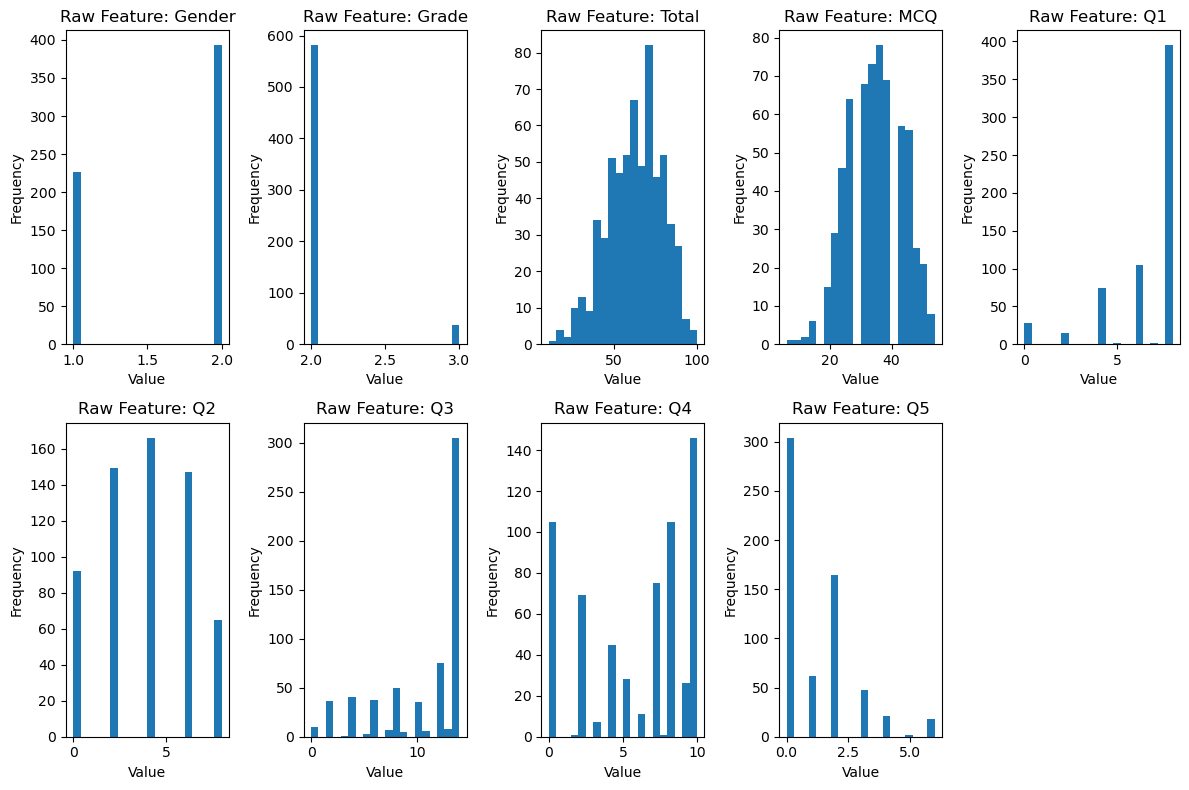

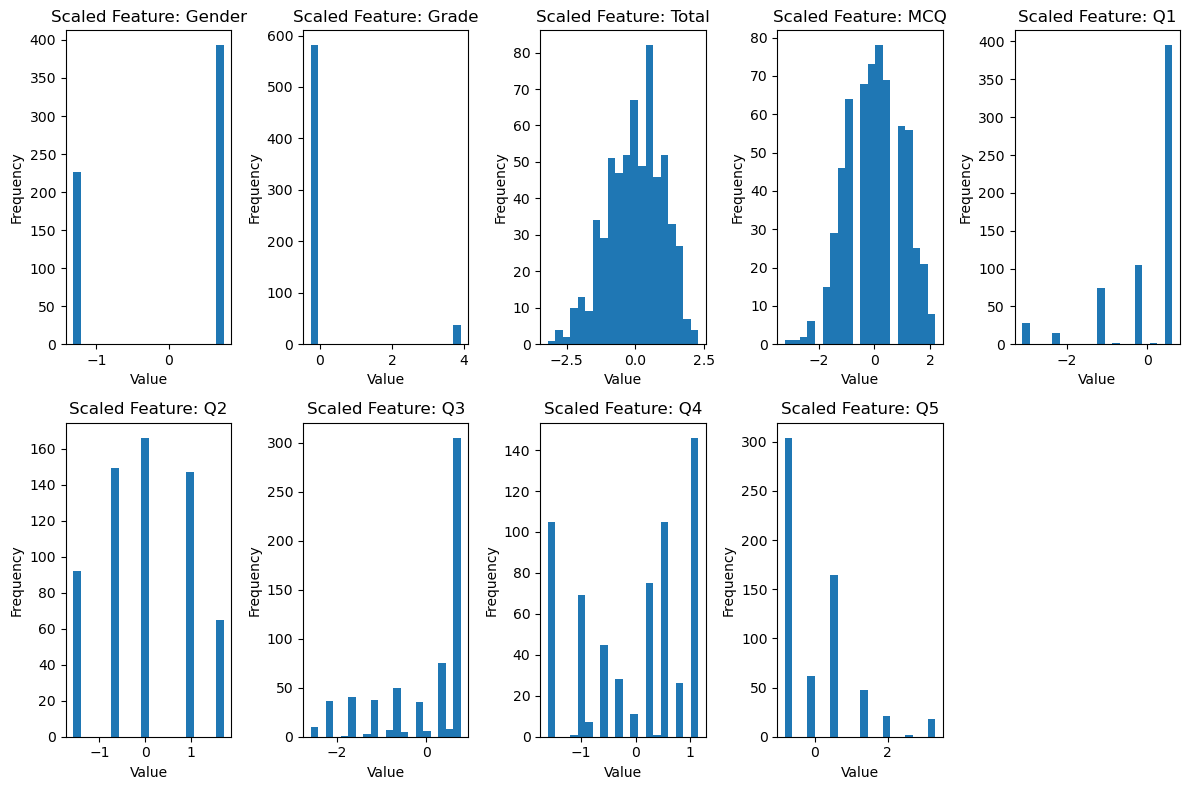

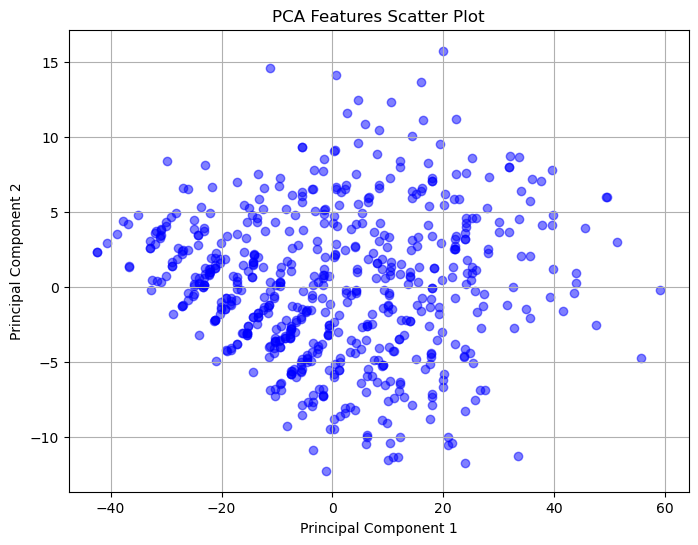

In [16]:
# 可视化原始特征
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data0.columns):
    plt.subplot(2, 5, i+1)
    plt.hist(data[feature], bins=20)
    plt.title(f'Raw Feature: {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 可视化标准化特征
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data0.columns):
    plt.subplot(2, 5, i+1)
    plt.hist(scaled_data[:, i], bins=20)
    plt.title(f'Scaled Feature: {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 可视化PCA特征
plt.figure(figsize=(8, 6))
plt.scatter(score[:, 0], score[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Features Scatter Plot')
plt.grid(True)
plt.show()